In [4]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import sparse
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,KBinsDiscretizer
import xgboost
import random
from IPython.core.debugger import set_trace
import pickle
random.seed(0)
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dt_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Decision Tree.pkl','rb')
rf_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/RandomForestClassifier.pkl','rb')
lr_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Logistic Regression Classfier.pkl','rb')
xgb_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/xgb classifier.pkl','rb')
ada_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Adaptive Boosting Classifier.pkl','rb')
svc_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Support Vector Classifier.pkl','rb')
knc_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/KNeighbors Classifier.pkl','rb')
bc_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Bagging Classifier.pkl','rb')
gc_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Gradient Boost Classifier.pkl','rb')
lda_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Linear Discriminant Analysis.pkl','rb')
gnb_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Gaussian Naive Bayes Classifier.pkl','rb')
X_valid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Fully Preped Data/X_valid.csv')
y_valid = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Fully Preped Data/y_valid.csv')
cv_X = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Fully Preped Data/cross_validation_X.csv')
cv_y = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Fully Preped Data/cross_validation_y.csv')

In [8]:
dt = pickle.load(dt_path)
rf = pickle.load(rf_path)
lr = pickle.load(lr_path)
xgb = pickle.load(xgb_path)
ab = pickle.load(ada_path)
svc = pickle.load(svc_path)
knc = pickle.load(knc_path)
bc = pickle.load(bc_path)
gc = pickle.load(gc_path)
lda = pickle.load(lda_path)
gnb = pickle.load(gnb_path)

In [9]:
X_valid = sparse.csr_matrix(X_valid.values)
cv_X = sparse.csr_matrix(cv_X.values)

# Cross Validation Scores

In [10]:
models = [('Logistic Regression Classifier',lr),('Random Forest Classifier',rf),
          ('Decision Tree Classifier',dt),('XGBoost Random Forest Classifier',xgb),
          ('Adaptive Boosting Classifier',ab),('Support Vector Classifier',svc),
          ('KNeighbors Classifier',knc),('Bagging Classifier',bc),
          ('Gradient Boost Classifier',gc),('Linear Discriminant Analysis',lda),
          ('Gaussian Naive Bayes',gnb)]

In [11]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
splits = skf.split(cv_X,cv_y)

In [12]:
X = pd.DataFrame(cv_X.toarray())

In [13]:
y = cv_y.values.reshape(-1)

In [14]:
model_cv_scores = {}
for i in range(len(models)):
  model = models[i]
  print(model[0])
  model_cv_scores[model[0]]={'recall scores':[],'accuracy scores':[]}
  splits = skf.split(cv_X,cv_y)
  for split,(train,test) in enumerate(splits):
    print(split,(train,test))
    if model[0] == 'Logistic Regression Classifier':
      model[1].fit(X.iloc[train,:],y[train])
      y_pred = model[1].predict_proba(X.iloc[test,:])[:,1]>0.4
    elif model[0] == 'Adaptive Boosting Classifier':
      model[1].fit(X.iloc[train,:],y[train])
      y_pred = model[1].predict_proba(X.iloc[test,:])[:,1]>0.4975
    else:
      model[1].fit(X.iloc[train,:],y[train])
      y_pred = model[1].predict(X.iloc[test,:])

    model_cv_scores[model[0]]['recall scores'].append(recall_score(y[test],y_pred))
    model_cv_scores[model[0]]['accuracy scores'].append(accuracy_score(y[test],y_pred))

Logistic Regression Classifier
0 (array([    0,     1,     3, ..., 16673, 16674, 16675]), array([    2,     4,     7, ..., 16661, 16665, 16671]))
1 (array([    0,     1,     2, ..., 16671, 16672, 16674]), array([    3,    19,    21, ..., 16670, 16673, 16675]))
2 (array([    1,     2,     3, ..., 16673, 16674, 16675]), array([    0,     5,     8, ..., 16641, 16646, 16672]))
3 (array([    0,     2,     3, ..., 16673, 16674, 16675]), array([    1,     9,    10, ..., 16667, 16668, 16669]))
4 (array([    0,     1,     2, ..., 16672, 16673, 16675]), array([    6,    11,    12, ..., 16625, 16655, 16674]))
Random Forest Classifier
0 (array([    0,     1,     3, ..., 16673, 16674, 16675]), array([    2,     4,     7, ..., 16661, 16665, 16671]))
1 (array([    0,     1,     2, ..., 16671, 16672, 16674]), array([    3,    19,    21, ..., 16670, 16673, 16675]))
2 (array([    1,     2,     3, ..., 16673, 16674, 16675]), array([    0,     5,     8, ..., 16641, 16646, 16672]))
3 (array([    0,     2, 

KeyboardInterrupt: ignored

In [ ]:
cross_val_df = pd.DataFrame(model_cv_scores)
cross_val_df

,Logistic Regression Classifier,Random Forest Classifier,Decision Tree Classifier,XGBoost Random Forest Classifier,Adaptive Boosting Classifier,Support Vector Classifier,KNeighbors Classifier,Bagging Classifier,Gradient Boost Classifier,Linear Discriminant Analysis,Gaussian Naive Bayes
recall scores,"[0.8878896882494005, 0.8752249550089982, 0.878...","[0.9544364508393285, 0.9562087582483503, 0.949...","[0.9226618705035972, 0.9094181163767247, 0.916...","[0.9640287769784173, 0.9664067186562687, 0.971...","[0.9574340527577938, 0.9622075584883023, 0.967...","[0.8693045563549161, 0.8740251949610078, 0.877...","[0.986810551558753, 0.9928014397120576, 0.9808...","[0.9460431654676259, 0.9412117576484703, 0.940...","[0.9280575539568345, 0.9262147570485902, 0.929...","[0.7847721822541966, 0.7738452309538092, 0.770...","[0.9664268585131894, 0.9436112777444511, 0.956..."
accuracy scores,"[0.8414268585131894, 0.8335832083958021, 0.847...","[0.9343525179856115, 0.9421289355322339, 0.940...","[0.9046762589928058, 0.9031484257871064, 0.905...","[0.8336330935251799, 0.8338830584707646, 0.840...","[0.8794964028776978, 0.8743628185907046, 0.877...","[0.8845923261390888, 0.8839580209895053, 0.886...","[0.8983812949640287, 0.9010494752623688, 0.894...","[0.927158273381295, 0.9274362818590705, 0.9316...","[0.9193645083932853, 0.9175412293853074, 0.921...","[0.795263788968825, 0.7913043478260869, 0.7961...","[0.6016187050359713, 0.6068965517241379, 0.605..."


In [ ]:
cross_val_df.loc['recall scores','Logistic Regression Classifier']

[0.8878896882494005,
 0.8752249550089982,
 0.8788242351529694,
 0.8848920863309353,
 0.8932853717026379]

In [ ]:
rcs = []
acc = []
for model in models:
  rcs.append(cross_val_df.loc['recall scores',model[0]])
  acc.append(cross_val_df.loc['accuracy scores',model[0]])

In [ ]:
rcs

[[0.8878896882494005,
  0.8752249550089982,
  0.8788242351529694,
  0.8848920863309353,
  0.8932853717026379],
 [0.9544364508393285,
  0.9562087582483503,
  0.9496100779844031,
  0.9628297362110312,
  0.959832134292566],
 [0.9226618705035972,
  0.9094181163767247,
  0.9166166766646671,
  0.9160671462829736,
  0.9130695443645084],
 [0.9640287769784173,
  0.9664067186562687,
  0.9718056388722256,
  0.9664268585131894,
  0.9682254196642686],
 [0.9574340527577938,
  0.9622075584883023,
  0.967006598680264,
  0.9652278177458034,
  0.9628297362110312],
 [0.8693045563549161,
  0.8740251949610078,
  0.8770245950809838,
  0.882494004796163,
  0.8770983213429256],
 [0.986810551558753,
  0.9928014397120576,
  0.9808038392321535,
  0.9886091127098321,
  0.9934052757793765],
 [0.9460431654676259,
  0.9412117576484703,
  0.9400119976004799,
  0.9550359712230215,
  0.9526378896882494],
 [0.9280575539568345,
  0.9262147570485902,
  0.9292141571685663,
  0.9394484412470024,
  0.9364508393285371],
 [0.7

In [ ]:
classifiers = [model[0] for model in models]
classifiers[3] = 'XGBoost Classifier'

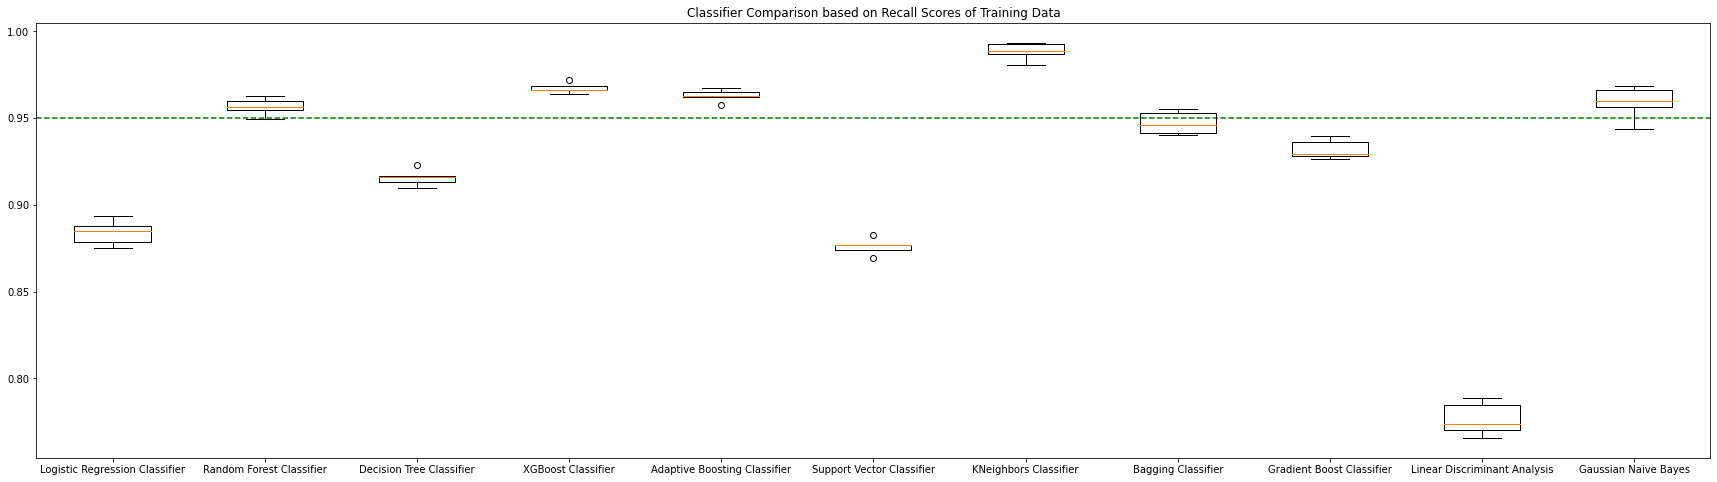

In [ ]:
plt.figure(figsize=(30,8))
plt.title('Classifier Comparison based on Recall Scores of Training Data')
plt.boxplot(rcs)
plt.xticks(np.arange(1,12),labels=classifiers)
plt.hlines(y=0.95,xmin=0.5,xmax=11.5,ls='--',color='g')
plt.savefig('Classifier Comparisons interms of Recall based on Cross Validation')
plt.show()

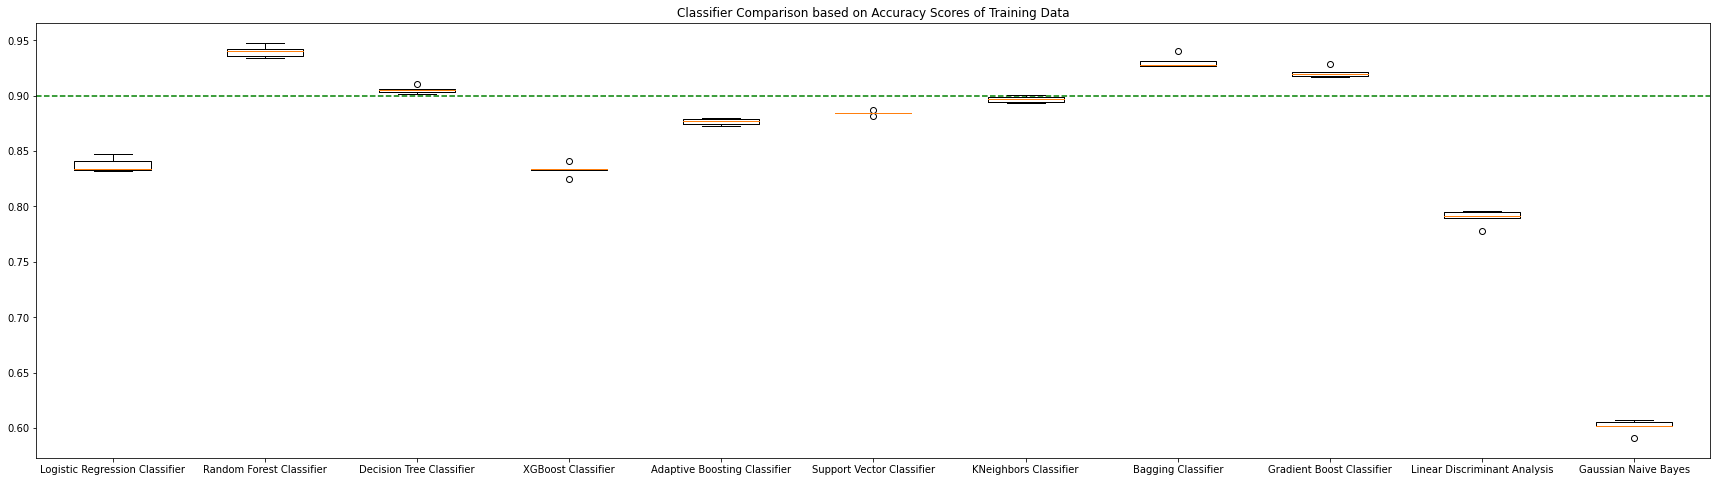

In [ ]:
plt.figure(figsize=(30,8))
plt.title('Classifier Comparison based on Accuracy Scores of Training Data')
plt.boxplot(acc)
plt.xticks(np.arange(1,12),labels=classifiers)
plt.hlines(y=0.90,xmin=0.5,xmax=11.5,ls='--',color='g')
plt.savefig('Classifier Comparisons interms of Accuracy based on Cross Validation')
plt.show()

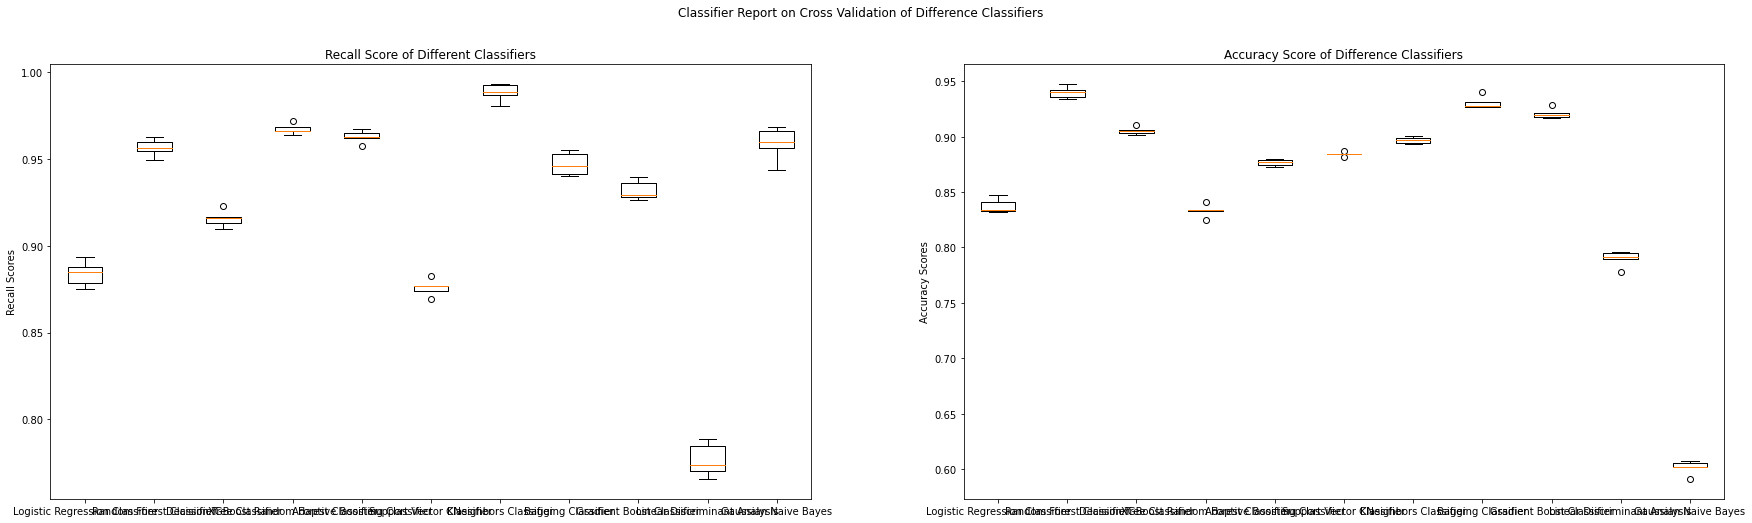

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(30,8))
ax = ax.flatten()

fig.suptitle('Classifier Report on Cross Validation of Difference Classifiers')
ax[0].boxplot(rcs)
ax[0].set_xticklabels(classifiers)
ax[0].set_title('Recall Score of Different Classifiers')
ax[0].set_ylabel('Recall Scores')

# ax[1].boxplot(acc)
# ax[1].set_xticklabels(classifiers)
# ax[1].set_title('Accuracy Score of Difference Classifiers')
# ax[1].set_ylabel('Accuracy Scores')

plt.show()

# Validation Data Scores

In [15]:
dt_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Decision Tree.pkl','rb')
rf_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/RandomForestClassifier.pkl','rb')
lr_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Logistic Regression Classfier.pkl','rb')
xgb_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Extreme Gradient Boost Classifier.pkl','rb')
ada_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Adaptive Boosting Classifier.pkl','rb')
svc_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Support Vector Classifier.pkl','rb')
knc_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/KNeighbors Classifier.pkl','rb')
bc_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Bagging Classifier.pkl','rb')
gc_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Gradient Boost Classifier.pkl','rb')
lda_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Linear Discriminant Analysis.pkl','rb')
gnb_path = open('/content/drive/My Drive/Colab Notebooks/Final Project/Online Shoppers Intention/Classifier Dumps/Gaussian Naive Bayes Classifier.pkl','rb')
dt = pickle.load(dt_path)
rf = pickle.load(rf_path)
lr = pickle.load(lr_path)
xgb = pickle.load(xgb_path)
ab = pickle.load(ada_path)
svc = pickle.load(svc_path)
knc = pickle.load(knc_path)
bc = pickle.load(bc_path)
gc = pickle.load(gc_path)
lda = pickle.load(lda_path)
gnb = pickle.load(gnb_path)

In [16]:
models = [('Logistic Regression Classifier',lr),('Random Forest Classifier',rf),('Decision Tree Classifier',dt),('XGBoost Random Forest Classifier',xgb),('Adaptive Boosting Classifier',ab),('Support Vector Classifier',svc),('KNeighbors Classifier',knc),('Bagging Classifier',bc),('Gradient Boost Classifier',gc),('Linear Discriminant Analysis',lda),('Gaussian Naive Bayes',gnb)]

In [17]:
scores={}
for model in models:
  scores[model[0]]={}
  print(model[0])
  if model[0] == 'Logistic Regression Classifier':
    y_pred = model[1].predict_proba(X_valid)[:,1]>0.4
  elif model[0] == 'Adaptive Boosting Classifier':
    y_pred = model[1].predict_proba(X_valid)[:,1]>0.4975
  elif model[0] == 'Linear Discriminant Analysis' or model[0] == 'Gaussian Naive Bayes':
    y_pred = model[1].predict(X_valid.toarray())
  else:
    y_pred = model[1].predict(X_valid)

  scores[model[0]]['Accuracy Score'] = accuracy_score(y_valid,y_pred)
  scores[model[0]]['Recall Score'] = recall_score(y_valid,y_pred)

Logistic Regression Classifier
Random Forest Classifier
Decision Tree Classifier
XGBoost Random Forest Classifier
Adaptive Boosting Classifier
Support Vector Classifier
KNeighbors Classifier
Bagging Classifier
Gradient Boost Classifier
Linear Discriminant Analysis
Gaussian Naive Bayes


In [18]:
print('Scores on Validation Set')
pd.DataFrame(scores).T

Scores on Validation Set


,Accuracy Score,Recall Score
Logistic Regression Classifier,0.845093,0.753927
Random Forest Classifier,0.900243,0.725131
Decision Tree Classifier,0.856853,0.625654
XGBoost Random Forest Classifier,0.725466,0.942408
Adaptive Boosting Classifier,0.801298,0.803665
Support Vector Classifier,0.868613,0.743455
KNeighbors Classifier,0.784266,0.704188
Bagging Classifier,0.889294,0.691099
Gradient Boost Classifier,0.888483,0.751309
Linear Discriminant Analysis,0.786294,0.738220
